# Plot Histogram of  $\gamma_{pr}$-number  of M sampled Cayley trees:


In [3]:
# Create Histogram Data H

import numpy
import collections
from tqdm import tqdm

n = 10000  # Number of vertices in the tree, e.g. 10000
M = 200  # Number of random trees to generate, e.g. 1000 
H = []     # List to store histogram data
# On these n=10000 and M=20000, my laptop run for about 30min

for _ in tqdm(range(1, M + 1), desc="Processing"):
    # Generate a random tree with n vertices
    T = graphs.RandomTree(n)

    # BFS setup using deque for efficient popping
    queue = collections.deque([0])
    parent = {0: None}
    order = []

    while queue:
        v = queue.popleft()
        order.append(v)
        for child in T[v]:
            if child not in parent:  # Ensure we do not revisit the parent
                parent[child] = v
                queue.append(child)

    
    # Initialise marking dictionary
    B = collections.defaultdict(lambda: [0, 0])  # Create boolean [In_PD, Dom_by_Child] 
    
    # Process nodes from leaves to root
    for l in reversed(order[1:]):  # Ingnore root 0
        p = parent[l]  # always exists, p is never none could be 0
        gp = parent[p] if p is not None else None # possible gp is None

        if B[l][1] == 0 and B[p][0] == 0 and p!=0 and B[gp][0]==0:
            B[p][0] = B[gp][0] = B[gp][1] = 1
            if gp!=0:
                B[parent[gp]][1] = 1

        elif B[l][1] == 0 and B[p][0] == 0 and (p==0 or B[gp][0]==1):
            B[l][0] = B[p][0] = B[p][1] = 1
            if p!=0:
                B[gp][1] = 1

    # Ensure root is dominated
    if B[0][1] == 0:
        B[0][0] = B[order[1]][0] = B[0][1] = 1

    # Compute PD-number
    PD = sum(1 for k in range(n) if B[k][0] == 1)
    
    H.append(PD)
    #H.append(RR(PD / n)) #Uncomment this isntead if you want proportion

print("Completed.")    
#Uncomment code below if you 

# hist = histogram(H, bins=50, axes_labels=["PD-numb", "Frequency"], title="Distribution of PD-Numbers")
# hist.show()

# # Efficient mean computation
# average_marked = numpy.mean(H)
# print(f"Average Proportion of PD-Nodes: {average_marked:.6f}")    

Processing: 100%|█████████████████████████████| 200/200 [00:10<00:00, 18.20it/s]

Completed.


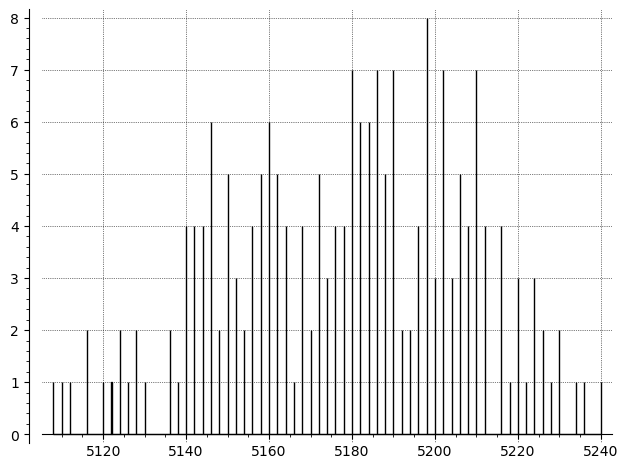

Average: 5178.20


In [4]:
# Plot histogram, select parameters as you please 
import matplotlib.pyplot as plt

hist = histogram(H, bins=50000, axes_labels=["", ""], title="", color="gray")
hist.show(gridlines="medium")


# Efficient mean computation
average_marked = numpy.mean(H)
print(f"Average: {average_marked:.2f}")    